# 数据分析三剑客
* NumPy
  * 使用场景：高性能数值计算
  * 用户指南：<https://numpy.org/doc/stable/user>
* Pandas
  * 使用场景：结构化数据（表格）处理
  * 用户指南：<https://pandas.pydata.org/pandas-docs/stable/user_guide>
* Matplotlib
  * 使用场景：数据可视化
  * 用户指南：<https://matplotlib.org/stable/users/index.html>

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rootpath = Path(
    "/public/home/XiaAnRen/data3/vscode/python_3.11"
    "/Tutorial/tutorial/postprocess",
)
os.chdir(rootpath)

## NumPy
* 主要特点：
  * 底层是通过C语言实现的，因此相比使用纯Python的方法，NumPy速度更快、运算效率也更高。
  * 支持向量化编程，即可以将数组看作整体进行计算。
* 使用技巧：
  * 当想要实现某一功能时（求统计量、找最值的索引、积分等），优先考虑NumPy是否有该方法（询问AI），或者能否借助已有的功能，不要重复造轮子（麻烦而且效率低）。
  * 编程时尽可能以数组为单位，这样写代码和实际运行起来都会很快。  
    不要学AI的写法，即创建空数组，再通过for循环依次计算并赋值。  
    原因在于for循环运行在Python层面，在数据量非常大的时候慢得尤为显著，这样写就浪费了NumPy提供的高效运算能力。
* 示例代码：
  * 以《大气辐射学》第三次作业为例，即计算$A_\mathrm{oz}$随$x$的变化情况，其中$x$的范围为$[0,2]$，$A_\mathrm{oz}$由下式给出：

\begin{align*}
        A_\mathrm{oz}^\mathrm{vis}(x)
  ={} & \frac{0.02118x}{1 + 0.042x + 0.000323x^2}
        \text{；}
        \\[8pt]
        A_\mathrm{oz}^\mathrm{uv}(x)
  ={} & \frac{1.082x}{(1 + 138.6x)^{0.805}} + \frac{0.0658x}{1 + (103.6x)^3}
        \text{。}
\end{align*}

In [2]:
# 使用np.linspace创建了一个范围[0,2]，共101个元素的数组
# 类似的还有np.arange
# 两者区别在于：
# np.linspace是闭区间，np.arange是左闭右开区间
# np.linspace的步长会受浮点数精度影响出现波动（详见main02.csv的第一列）
# 因此：
# np.linspace适合对步长的精度没有要求的场景，此时能够显式给出范围及元素数量
# np.arange适合需要严格控制步长为定值的场景
x = np.linspace(0, 2, 101)
# 以数组为单位进行计算
# 这里的np.power(x, n)即x的n次方
vis = 0.02118 * x / (1 + 0.042 * x + 0.000323 * np.power(x, 2))
uv = (1.082 * x / np.power(1 + 138.6 * x, 0.805)) + (
    0.0658 * x / (1 + np.power(103.6 * x, 3))
)

In [3]:
x

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

In [4]:
np.arange(0, 2.001, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

## Pandas
* 主要特点：
  * 以类似表格的形式读取文件（文本文档、CSV、Excel等）并进行处理（表头、更友好的行列索引、一次性计算所有统计量、合并多个表格等）；
  * 可以将数据明文存储到表格文件中。
* 示例代码：
  * Pandas不是本文件重点，因此仅简单展示了创建数据对象并将其保存到CSV文件的过程。

In [5]:
# 将字典转换为DataFrame对象
# 字典中每一个键值对分别对应DataFrame的表头和该列数据
data = pd.DataFrame({"x": x, "vis": vis, "uv": uv})
# 保存为CSV文件并且不添加行索引
data.to_csv("main02.csv", index=False)

In [6]:
data

,x,vis,uv
0,0.00,0.000000,0.000000
1,0.02,0.000423,0.007565
2,0.04,0.000846,0.009576
3,0.06,0.001268,0.010785
4,0.08,0.001689,0.011651
...,...,...,...
96,1.92,0.037590,0.023123
97,1.94,0.037951,0.023170
98,1.96,0.038311,0.023217
99,1.98,0.038672,0.023264


## Matplotlib
* 主要特点：
  * 画图。
* 使用技巧：
  * 有时候需要基于`Axes`同时绘制多个子图，那么不妨在即使只有一张子图的情况下也使用相同的绘制流程。  
    即创建画布与子图，再分别在各个子图上进行绘制。  
    这样的好处在于流程以及所使用的方法都是固定的，不用专门在“绘制一张子图”与“绘制多张子图”之间转换思维方式。  
    因此尽量不要像AI那样类似`plt.plot`地画图。
* 示例代码：
  * 将$A_\mathrm{oz}$随$x$的变化情况进行可视化。

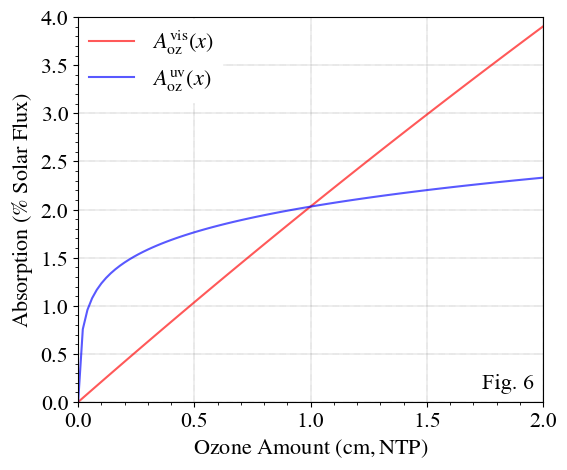

In [7]:
# 创建画布与子图
fig = plt.figure(figsize=(6, 5))
ax = fig.subplots()
# 添加网格线
ax.grid(linestyle=":", linewidth=0.3, color="black")
# 显示次刻度
ax.minorticks_on()
# 设置刻度字号
ax.tick_params(labelsize=16)
# 绘制折线图
ax.plot(
    x,
    vis * 100,
    color="red",
    linestyle="-",
    alpha=0.65,
    label="$A_\\mathrm{oz}^\\mathrm{vis}(x)$",
)
ax.plot(
    x,
    uv * 100,
    color="blue",
    linestyle="-",
    alpha=0.65,
    label="$A_\\mathrm{oz}^\\mathrm{uv}(x)$",
)
# 设置x、y轴范围
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
# 设置x、y轴标签
ax.set_xlabel(
    "$\\mathrm{ Ozone \\ Amount \\ \\left( cm , NTP \\right) }$",
    fontsize=16,
)
ax.set_ylabel(
    "$\\mathrm{ Absorption \\ \\left( \\% \\ Solar \\ Flux \\right) }$",
    fontsize=16,
)
# 添加图例
ax.legend(
    loc=(0.005, 0.78),
    fontsize=16,
    facecolor="white",
    framealpha=1,
    edgecolor="1",
)
# 标识子图
ax.text(
    0.98,
    0.035,
    "Fig. 6",
    ha="right",
    transform=ax.transAxes,
    fontsize=16,
    bbox={"facecolor": "white", "alpha": 1, "lw": 0},
)
# 保存图片
plt.savefig("main02.png", bbox_inches="tight")